숙제

1. 지난 주의 와인 데이터를 활용해 위의 내용을 복습하세요.
2. K-Means를 활용하여 새 장수가 어느 군집에 속하는지 알아보세요.

In [1]:
import pandas as pd
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('week9_winequality-red.csv')

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
kmeans = KMeans(n_clusters=4).fit(X)

In [4]:
# 클러스터 레이블 받아오기
labels = kmeans.labels_
#labels = 1 - labels

# dimension reduction
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

reduct = PCA(n_components=2)
X_reduct = reduct.fit_transform(scaled_X)

Text(0.5, 1.0, 'K-means')

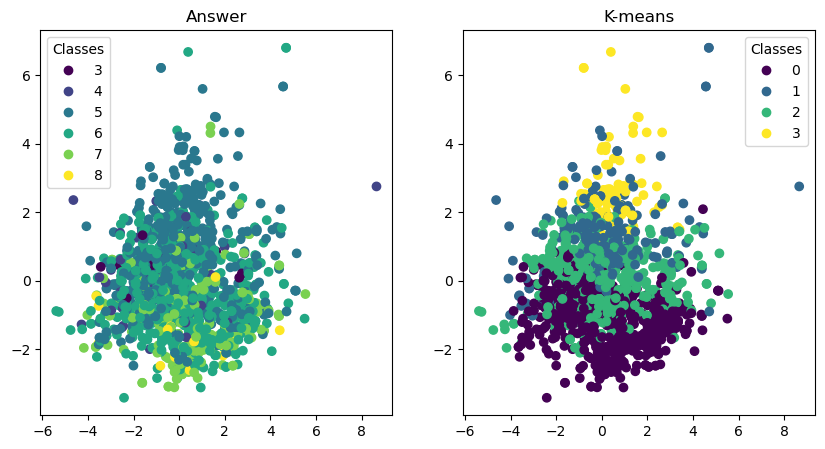

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

scatter_ax0 = ax[0].scatter(X_reduct[:,0], X_reduct[:,1], c=y)
ax[0].legend(*scatter_ax0.legend_elements(), title="Classes")
ax[0].set_title("Answer")
scatter_ax1 = ax[1].scatter(X_reduct[:,0], X_reduct[:,1], c=labels)
ax[1].legend(*scatter_ax1.legend_elements(), title="Classes")
ax[1].set_title("K-means")

Text(0.5, 1.0, 'Variance difference')

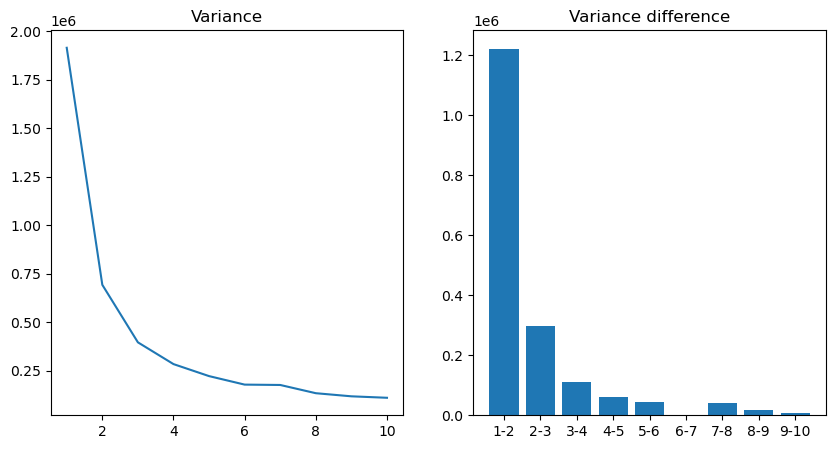

In [6]:
# K-means 에서 적절한 K 값 찾기
vars = []

range_K = range(1, 10+1) # 총 10개의 클러스터까지 검사
for k in range_K:
    kmeans = KMeans(n_clusters=k).fit(X)
    # variance를 계산하여 저장함
    vars.append(kmeans.inertia_)

# variance의 차이를 계산
var_diff = [s - t for s, t in zip(vars, vars[1:])]
var_diff_index = ["%d-%d"%(s,t) for s, t in zip(range_K, range_K[1:])]

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(range_K, vars)
ax[0].set_title("Variance")
ax[1].bar(var_diff_index, var_diff)
ax[1].set_title("Variance difference")

Text(0.5, 1.0, 'DBSCAN')

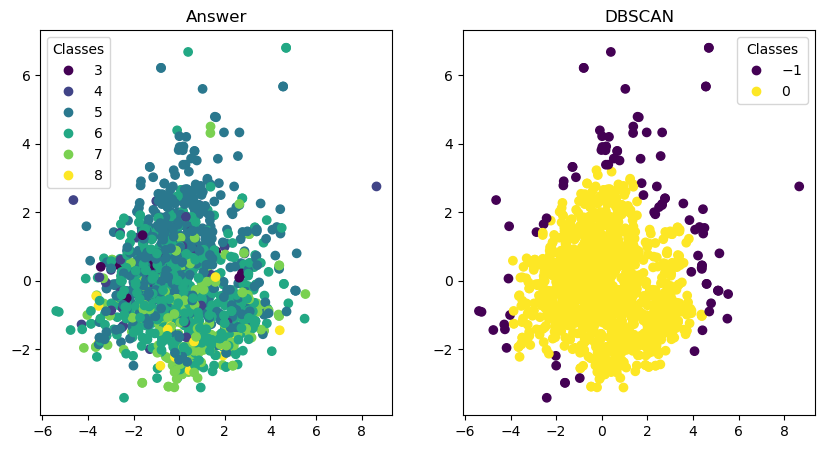

In [7]:
from sklearn.cluster import DBSCAN

# dimension reduction
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

reduce = PCA(n_components=2)
X_reduct = reduce.fit_transform(scaled_X)

# DBSCAN으로 군집화
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(X_reduct)

# 군집 레이블 받아오기
labels = dbscan.labels_

fig, ax = plt.subplots(1,2, figsize=(10,5))

scatter_ax0 = ax[0].scatter(X_reduct[:,0], X_reduct[:,1], c=y)
ax[0].legend(*scatter_ax0.legend_elements(), title="Classes")
ax[0].set_title("Answer")
scatter_ax1 = ax[1].scatter(X_reduct[:,0], X_reduct[:,1], c=labels)
ax[1].legend(*scatter_ax1.legend_elements(), title="Classes")
ax[1].set_title("DBSCAN")


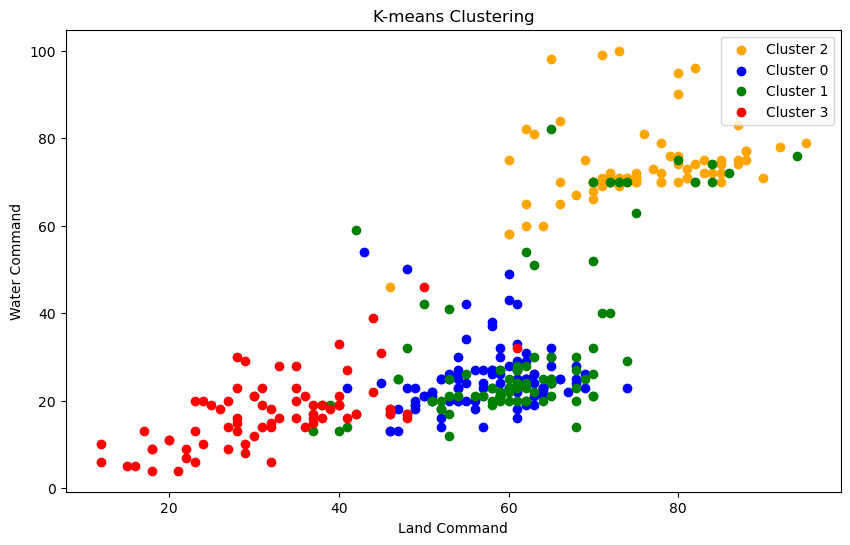

  class  cluster
0     3        2
1     1        0
2     1        0
3     0        0
4     0        0
   cluster
0        2
1        1
2        0
3        3
4        2


In [8]:
train = pd.read_excel('week8_sam3_testset.xlsx')
test = pd.read_excel('week8_sam3_prediction.xlsx')

features = ['land_command', 'water_command', 'force', 'intelligence', 'politics', 'charm']
palette = {'0': 'blue', '1': 'green', '2': 'orange', '3': 'red'}

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])

kmeans = KMeans(n_clusters=4, random_state=42)
train['cluster'] = kmeans.fit_predict(train_scaled)

train['class'] = train['class'].astype(str)

plt.figure(figsize=(10, 6))
for cluster in train['cluster'].unique():
    subset = train[train['cluster'] == cluster]
    plt.scatter(subset['land_command'], subset['water_command'], label=f'Cluster {cluster}', color=palette[str(cluster)])

plt.xlabel('Land Command')
plt.ylabel('Water Command')
plt.title('K-means Clustering')
plt.legend()
plt.show()

test_scaled = scaler.transform(test[features])
test['cluster'] = kmeans.predict(test_scaled)

print(train[['class', 'cluster']].head())
print(test[['cluster']].head())